In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("clustering.csv")
df = data.copy()

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


Hapus Duplikasi

In [52]:
df.duplicated().sum()

2

In [53]:
df = df.drop_duplicates()

In [5]:
# akses semua data pada kolom 'ApplicantIncome' dan 'LoanAmount' pada var data
data = df.loc[:, ['ApplicantIncome', 'LoanAmount']]

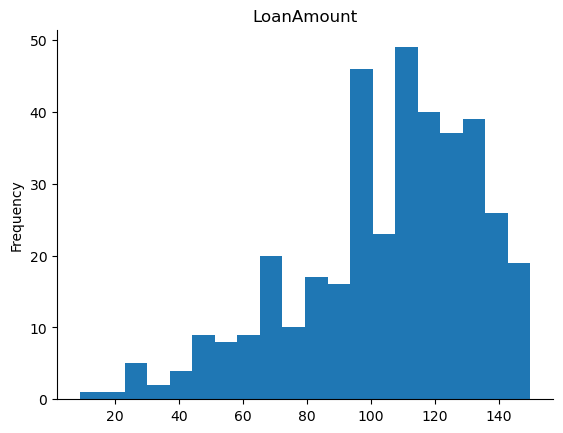

In [6]:
data['LoanAmount'].plot(kind='hist', bins=20, title='LoanAmount')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [7]:
# ambil values dari variabel data menjadi var X
X = data.values
X[:5]

array([[4583.,  128.],
       [3000.,   66.],
       [2583.,  120.],
       [6000.,  141.],
       [2333.,   95.]])

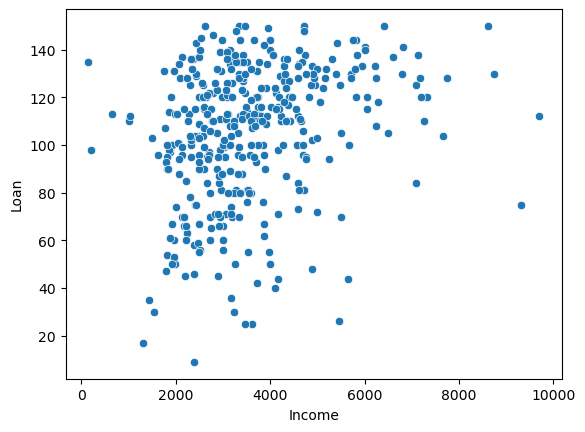

In [8]:
df = pd.DataFrame(X, columns=['Income', 'Loan'])
sns.scatterplot(data=df, x='Income', y='Loan')
plt.xlabel('Income')
plt.ylabel('Loan')
plt.show()

In [9]:
def calculate_cost(X, centroids, cluster):  
    sum = 0  
    for i, val in enumerate(X):    
        sum += np.sqrt((centroids[int(cluster[i]), 0]-val[0])**2 +(centroids[int(cluster[i]), 1]-val[1])**2)  
    return sum

In [10]:
import random
def kmeans(X, k):

    diff = 1
    #  tetapkan cluster semua baris data X menjadi 0
    cluster = np.zeros(X.shape[0])

    # tetapkan posisi centroid secara acak menurut jumlah data X atau len(x) sebanyak k
    random_indices = np.random.choice(len(X), size=k, replace=False)
    centroids = X[random_indices, :]

    while diff:

        # for each observation
        for i, row in enumerate(X):

            mn_dist = float('inf')
            # dist of the point from all centroids
            for idx, centroid in enumerate(centroids):
                # Menghitung jarak ApplicantIncome dan LoanAmount centroid
                d = np.sqrt((centroid[0]-row[0])**2 + (centroid[1]-row[1])**2)

                # store closest centroid
                if mn_dist > d:
                    mn_dist = d
                    cluster[i] = idx
                    
        # tentukan centroid baru dari rata-rata data cluster ke i
        new_centroids = pd.DataFrame(X).groupby(by=cluster).mean().values

        # if centroids are same then leave
        if np.count_nonzero(centroids-new_centroids) == 0:
            diff = 0
        else:
            centroids = new_centroids
    return centroids, cluster

In [26]:
cost_list = []

for k in range(1, 10):
    
    
    centroids, cluster = kmeans(X, k)

    # WCSS (Within cluster sum of square)
    cost = calculate_cost(X, centroids, cluster)
    cost_list.append(cost)

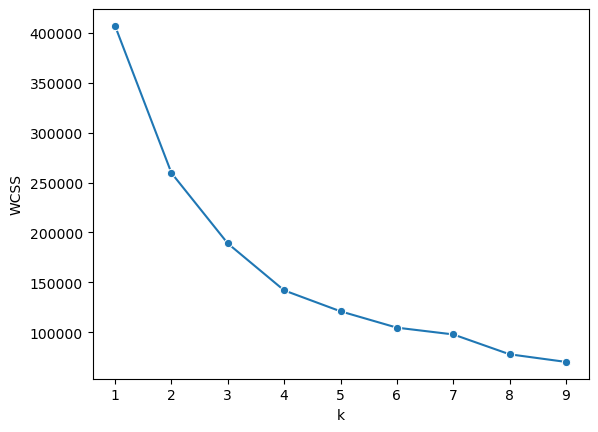

In [12]:
sns.lineplot(x=range(1,10), y=cost_list, marker='o')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.show()

In [13]:
k = 4
centroids, cluster = kmeans(X, k)

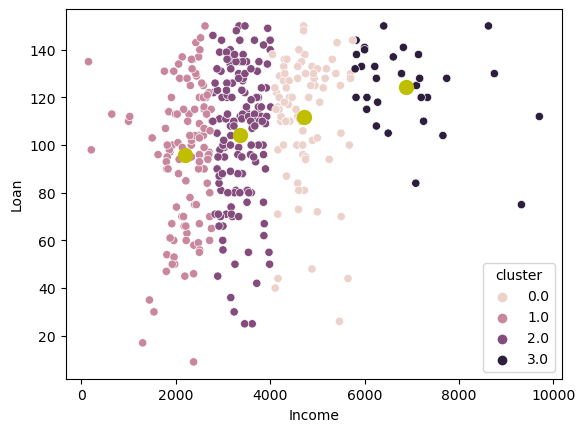

In [14]:
df = pd.DataFrame(X, columns=['Income', 'Loan'])
df['cluster'] = cluster

sns.scatterplot(data=df, x='Income', y='Loan', hue='cluster')
plt.scatter(centroids[:,0], centroids[:, 1], s=100, color='y')
plt.xlabel('Income')
plt.ylabel('Loan')
plt.show()

In [63]:
for i, row in enumerate(X):
    mn_dist = float('inf')
    # dist of the point from all centroids
    for idx, centroid in enumerate(centroids):
        # Menghitung jarak ApplicantIncome dan LoanAmount centroid
        d = np.sqrt((centroid[0]-row[0])**2 + (centroid[1]-row[1])**2)

        # store closest centroid
        if mn_dist > d:
            mn_dist = d
            cluster[i] = idx